# **Laptop Price Prediction**

## <u>***Problem Statement***</u>

#### <font color=blue>Today's laptops market is highly compititive and fluctuating with several available brands and various models having different specification at different price range. Therefore it is very difficut for customers to select a laptop which fulfill their requirements as well as fits into thier budget. For case of retailer and manufaturer knowing the factors which effect cost of laptop may be vary essential to setting up the price ranges, managing stocks and tageting advertizment. Accordingly those factors the schemes will develop that predict the price of laptop based on specification and features which helps many both cutomers as well as industry stackholders to make informed decitions.</font>

## <u>***Objective***</u>

#### <font color=blue>Build a machine learning pipeline to predict the price of laptop based on their specification and feature. Overcoming this Problem can imporve the company's marketing positions, customer satisfaction and overall sales performance.</font>

## <u>***Data Collection***</u>

#### <font color=blue>Data reqired to build a machine learning model is collected from a "Kaggle"</font>
#### <font color=blue>Link of the dataset :- https://www.kaggle.com/datasets/patul252/laptop-prices</font>
#### <font color=blue>This data has many attributes such as:</font>
#### <font color=blue>* Laptop specifications</font>
#### <font color=blue>* Brand and model.</font>
#### <font color=blue>* Price.</font>

## <u>***Machine Learning formulation***</u>

#### <font color=blue>Hence this can be formulated as Regression kind of problem where target variable is the Laptop price and various attributes of laptop can be considered as features.</font>

## <u>***Data Exploration***</u>

### **Importing all the required libraries**

In [10]:
import pandas as pandu
import numpy as numpu
import seaborn as sns
import matplotlib.pyplot as plt
import re as regx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [11]:
sanganak = pandu.read_csv("C:\\Users\\rohit\\Assignments\\ML\\Laptop_Data.csv")
sanganak.sample(5)

,Serial_Number,Company_Name,Laptop_Type,Screen_Size,Screen_Resolution,Processor,RAM,Storage,GPU,Operating_System,Weight,Price
876,876,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Linux,2kg,21258.1872
428,428,HP,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.35kg,106506.7200
396,396,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon RX 550,Windows 10,2.1kg,65510.9568
1015,1015,Toshiba,Notebook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.5kg,64468.8000
828,828,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,18914.4000


In [12]:
sanganak.shape

(1303, 12)

In [13]:
sanganak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_Number      1303 non-null   int64  
 1   Company_Name       1303 non-null   object 
 2   Laptop_Type        1303 non-null   object 
 3   Screen_Size        1303 non-null   float64
 4   Screen_Resolution  1303 non-null   object 
 5   Processor          1303 non-null   object 
 6   RAM                1303 non-null   object 
 7   Storage            1303 non-null   object 
 8   GPU                1303 non-null   object 
 9   Operating_System   1303 non-null   object 
 10  Weight             1303 non-null   object 
 11  Price              1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### **Dataset Characteristics**

#### <font color=blue>The dataset contains 1303 entries with 12 columns:<font color=blue>

#### <font color=blue>Serial_Number:- A unique identifier for each laptop.</font>
#### <font color=blue>Company_Name:- The brand of the laptop.</font>
#### <font color=blue>Laptop_Type:- The type of laptop</font>
#### <font color=blue>Screen_Size:- The size of the screen.</font>
#### <font color=blue>Screen_Resolution:- The resolution of the screen.</font>
#### <font color=blue>Processor:- The processor details.</font>
#### <font color=blue>RAM:- The amount of RAM.</font>
#### <font color=blue>Storage:- The storage details.</font>
#### <font color=blue>GPU:- The graphics card details.</font>
#### <font color=blue>Operating_System:- Operating system.</font>
#### <font color=blue>Weight:- Laptop's weight.</font>
#### <font color=blue>Price:- Laptop's price.</font>

## <u>***Data Processing and Feature Engineering***</u>

### **Data quality issues**

#### <font color=blue>Null values:- Checkout does our data contain any null values.</font>
#### <font color=blue>Dublicate rows:- Identify duplicate rows which may leads to overfitting issues and wastage of storage.</font>

In [17]:
sanganak.isnull().sum()

Serial_Number        0
Company_Name         0
Laptop_Type          0
Screen_Size          0
Screen_Resolution    0
Processor            0
RAM                  0
Storage              0
GPU                  0
Operating_System     0
Weight               0
Price                0
dtype: int64

In [18]:
sanganak.duplicated().sum()

0

### <font color=red>**Observation**</font>

#### <font color=blue>Our dataset does not contain null values and there is no dublicate rows either which simplifies data processing and allow us to focus more on feature engineering.</font>

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


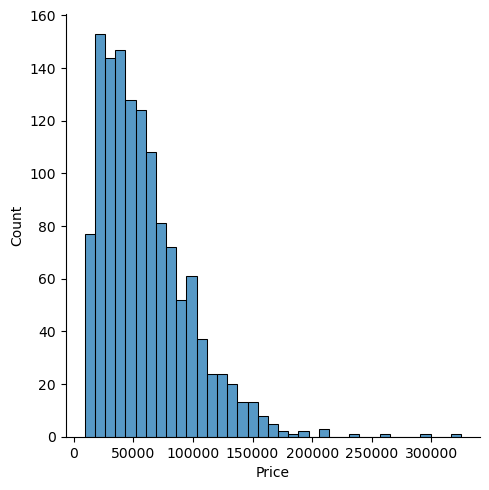

In [20]:
sns.displot(sanganak['Price'])

<Axes: xlabel='Company_Name'>

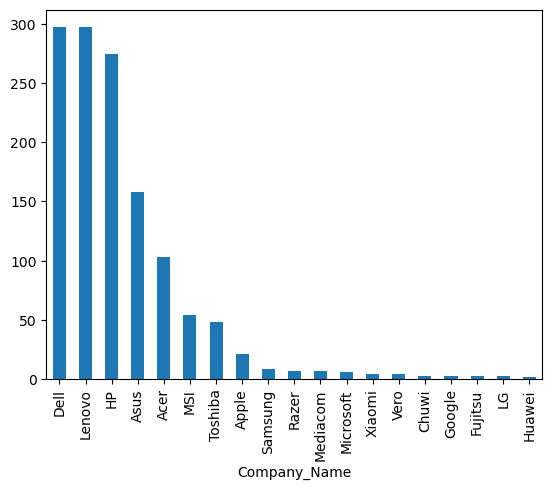

In [21]:
sanganak['Company_Name'].value_counts().plot(kind = 'bar')

### <font color=red>**Observation**</font>

#### <font color=blue>From above two graphs we can observe that our distribution is not normal, it is right skewed as you can see in the displot. It means that the tail on the right side of the distribution will be longer and fater compared to left side. Right skewed distribution is very common in most real world dataset, particullarly for variables like income, sales. As it is a right skewed we have to apply some transformation to make it normal distribution.</font>

#### <font color=blue>We will simply take the natural logarithm of the data. This is a effective method in order to reduce skewness to the right.</font>

#### <font color=blue>**>>** First of all we will drop the 'Serial_Number' column as it is not usefull for our prediction.</font>

In [24]:
sanganak.drop(columns=['Serial_Number'], inplace= True)

In [25]:
sanganak.shape

(1303, 11)

### **RAM and Weight**

### <font color=red>**Observation**</font>

#### <font color=blue>In the process of developing the machine learning models, the essential step is to convert the features into numerical format for algorithm to understand and analysis. There are some features such as "RAM" and "Weight" where there units are mentionded in their respective column. And we need to remove GB and kg to make it able to convert in numeric data type.</font>

In [28]:
sanganak['RAM'] = sanganak['RAM'].str.replace('GB', '')
sanganak['Weight'] = sanganak['Weight'].str.replace('kg', '')
sanganak['RAM'] = sanganak['RAM'].astype('int32')
sanganak['Weight'] = sanganak['Weight'].astype('float32')

### **Screen_Resolution**

<Axes: xlabel='Screen_Resolution'>

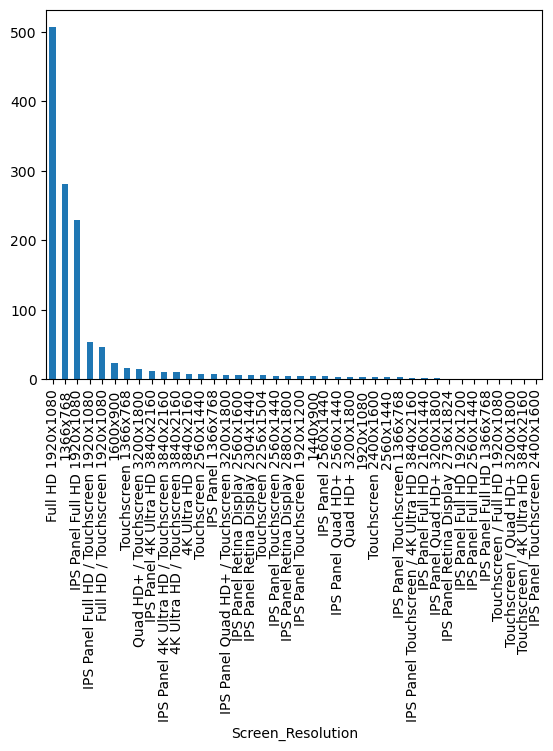

In [30]:
sanganak['Screen_Resolution'].value_counts().plot(kind = 'bar')

### <font color=red>**Observation**</font>

#### <font color=blue>In screen resolution we majorly have two types of display which are "Touchscreen" and "IPS". Therefore we will create two new features which can help us improve the prediction of our machine learning model.</font>

In [32]:
sanganak['Touchscreen'] = 0

for index, row in sanganak.iterrows():
    if 'Touchscreen' in row['Screen_Resolution']:
        sanganak.at[index, 'Touchscreen'] = 1

In [33]:
sanganak['IPS'] = 0

for index, row in sanganak.iterrows():
    if 'IPS' in row['Screen_Resolution']:
        sanganak.at[index, 'IPS'] = 1

### <font color=red>**Observation**</font>

#### <font color=blue>As we know screen resolution are the combination of horizontal and vertical dimention of the screen. Therefore we will create two new features from "Screen_Resolution". And as we have extracted important data from "Screen_Resolution", we can drop that column as well.</font>

In [35]:
sanganak['Hori_Resol'] = ""

for index, row in sanganak.iterrows():
    screen_res = row['Screen_Resolution']
    if 'x' in screen_res:
        x_index = screen_res.index('x')
        sanganak.at[index, 'Hori_Resol'] = screen_res[x_index - 4:x_index]

In [36]:
sanganak['Verti_Resol'] = ""

for index, row in sanganak.iterrows():
    screen_res = row['Screen_Resolution']
    if 'x' in screen_res:
        sanganak.at[index, 'Verti_Resol'] = screen_res.split('x')[-1]

In [37]:
sanganak['Hori_Resol'] = sanganak['Hori_Resol'].astype('int')
sanganak['Verti_Resol'] = sanganak['Verti_Resol'].astype('int')

In [38]:
sankhya_stambha = sanganak.select_dtypes(include=['number']).columns
sankhya_sanganak = sanganak[sankhya_stambha]

cor_relation = sankhya_sanganak.corr()['Price']
cor_relation

Screen_Size    0.068197
RAM            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
Hori_Resol     0.556529
Verti_Resol    0.552809
Name: Price, dtype: float64

### <font color=red>**Observation**</font>

#### <font color=blue>As we have seen from above result H_Resolution and V_Resolution are highly correlated with each other. Here we can merged H_Resolution and V_Resolution to ppi. And by including ppi we can discard the information of Screen_Size, H_Resolution and V_Resolution.</font>

In [40]:
sanganak['PPI'] = (pow(pow(sanganak['Hori_Resol'], 2) + pow(sanganak['Verti_Resol'], 2), 0.5) /sanganak['Screen_Size'] ).astype(float)

In [41]:
sankhya_stambha = sanganak.select_dtypes(include=['number']).columns
sankhya_sanganak = sanganak[sankhya_stambha]

cor_relation = sankhya_sanganak.corr()['Price']
cor_relation

Screen_Size    0.068197
RAM            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
Hori_Resol     0.556529
Verti_Resol    0.552809
PPI            0.473487
Name: Price, dtype: float64

In [42]:
sanganak.drop(columns=['Hori_Resol', 'Verti_Resol', 'Screen_Resolution', 'Screen_Size'], inplace=True)

### **Processor**

In [44]:
sanganak['Processor'].value_counts()

Processor
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [45]:
sanganak['Processor_Name'] = ""

for index, row in sanganak.iterrows():
    processor = row['Processor']
    if processor:
        processor_name = ' '.join(processor.split()[:3])
        sanganak.at[index, 'Processor_Name'] = processor_name

<Axes: xlabel='Processor_Name'>

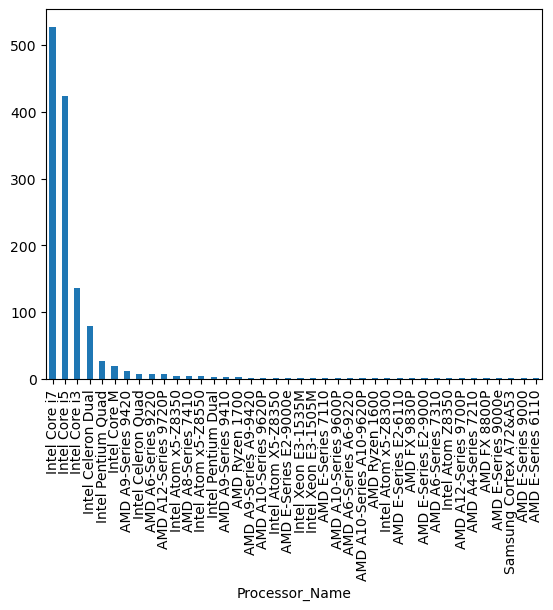

In [46]:
sanganak['Processor_Name'].value_counts().plot(kind = 'bar')

### <font color=red>**Observation**</font>

#### <font color=blue>There majorly two catagories of processor which are "Intel", "ARM" and there are very few of them are "Samsung". But most of the laptops have Intel's processor. Therefore we will divide processor into five catagories which are "Intel_Core_I7","Intel_Core_I5", "Intel_Core_I3", "AMD_Processor" and Other_Intel_Processor.</font>

In [48]:
def getProcessor(column):
    if column in {'Intel Core i7','Intel Core i5', 'Intel Core i3'}:
        return column
    elif 'Intel' in column:
        return 'Other_Intel_Processor'
    return 'AMD_Processor'

In [49]:
sanganak['Processor_Brand'] = sanganak['Processor_Name'].apply(getProcessor)
sanganak['Processor_Brand'].value_counts()

Processor_Brand
Intel Core i7            527
Intel Core i5            423
Other_Intel_Processor    154
Intel Core i3            136
AMD_Processor             63
Name: count, dtype: int64

In [50]:
sanganak.drop(columns=['Processor_Name', 'Processor'], inplace=True)

### **Storage**

In [52]:
sanganak['Storage'].value_counts()

Storage
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD        

### <font color=red>**Observation**</font>

#### <font color=blue>Here again we have different type of storage such as SSD, HDD and Flash storages.This storages comes with the different combinations and sizes. We can't even use any type encoding techniquec as there are not specific kind of catagories of storage.</font>
#### <font color=blue>We will distribute these storages in 4 catagories which are SSD, HDD, Hybrid and Flash storage. We will import "re" which is a regular expression module in python. And we will maintain the size of storages in GB.</font>
#### <font color=blue>"getStorageSize" function will correctly parse different storage and convert them into a GB which will usefull for further analysis.</font>
#### <font color=blue>At the end we will drop the "Storage" column.</font>

In [54]:
import re as regx

def getStorageSize(memory):
    ssd_size_gb = 0
    hdd_size_gb = 0
    hybrid_size_gb = 0
    flash_size_gb = 0

    ssd_size = regx.search(r'(\d+)(?:GB|TB) SSD', memory)
    if ssd_size:
        if 'TB' in ssd_size.group():
            ssd_size_gb = int(float(ssd_size.group(1)) * 1024)
        else:
            ssd_size_gb = int(ssd_size.group(1))

    hdd_size = regx.search(r'(\d+)(?:GB|TB) HDD', memory)
    if hdd_size:
        if 'TB' in hdd_size.group():
            hdd_size_gb = int(float(hdd_size.group(1)) * 1024)
        else:
            hdd_size_gb = int(hdd_size.group(1))

    hybrid_size = regx.search(r'(\d+(?:\.\d+)?)TB Hybrid', memory)
    if hybrid_size:
        hybrid_size_gb = int(float(hybrid_size.group(1)) * 1024)


    flash_size = regx.search(r'(\d+)GB Flash Storage', memory)
    if flash_size:
        flash_size_gb = int(flash_size.group(1))

    return ssd_size_gb, hdd_size_gb, hybrid_size_gb, flash_size_gb


In [55]:
sanganak['SSD'], sanganak['HDD'], sanganak['Hybrid'], sanganak['Flash_Storage'] = zip(*sanganak['Storage'].apply(getStorageSize))
sanganak.drop(columns=['Storage'], inplace=True)

In [56]:
sankhya_stambha = sanganak.select_dtypes(include=['number']).columns
sankhya_sanganak = sanganak[sankhya_stambha]

cor_relation = sankhya_sanganak.corr()['Price']
cor_relation

RAM              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
SSD              0.675986
HDD             -0.093112
Hybrid           0.008822
Flash_Storage   -0.040511
Name: Price, dtype: float64

### <font color=red>**Observation**</font>

#### <font color=blue>As we can see Flash Storage and Hybrid have very weak correlation with price which indicates that these features does not much significance for analysis.</font>

In [58]:
sanganak.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

### **GPU**

In [60]:
sanganak['GPU'].value_counts()

GPU
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

### <font color=red>**Observation**</font>

#### <font color=blue>Here again we have different brands in GPU. First we will extract all the GPU brand name and create a new column for it.</font>

In [62]:
def extract_gpu_brand(gpu):
    if gpu:
        return gpu.split()[0]
    else:
        return None

In [63]:
sanganak['GPU_Brand'] = sanganak['GPU'].apply(extract_gpu_brand)

In [64]:
sanganak['GPU_Brand'].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [65]:
sanganak = sanganak[sanganak['GPU_Brand'] != 'ARM']

In [66]:
sanganak.drop(columns=['GPU'], inplace= True)

### <font color=red>**Observation**</font>

#### <font color=blue>As we have seen from the above result that we only have one ARM GPU brand which does not going to effect our machine learning model. And we will drop the GPU column as well.</font>

### **Operating System**

In [69]:
sanganak['Operating_System'].value_counts()

Operating_System
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

### <font color=red>**Observation**</font>

#### <font color=blue>Here also we have various operating system but we will divid it in three catagories which are "Windows", "Mac" and "Others/No OS/Linux". And drop "Operating_System" coloumn.</font>

In [71]:
def getOS(os_name):
    if os_name in {'Windows 10', 'Windows 7', 'Windows 10 S'}:
        return 'Windows'
    elif os_name in {'Mac OS X', 'macOS'}:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [72]:
sanganak['OS'] = sanganak['Operating_System'].apply(getOS)
sanganak.drop(columns=['Operating_System'], inplace=True)

In [73]:
sankhya_stambha = sanganak.select_dtypes(include=['number']).columns
sankhya_sanganak = sanganak[sankhya_stambha]

cor_relation = sankhya_sanganak.corr()['Price']
cor_relation

RAM            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
SSD            0.675849
HDD           -0.093560
Name: Price, dtype: float64

## <u>***Model Training and Model Evaluation***</u>

### **Algorithm selection**
#### <font color=blue>There are few regression machine learning model which we are going to experiment with and find the best fit for our problem as well as evaluate those models.</font>

#### <font color=blue>1) Linear Regression</font>
#### <font color=blue>2) Decision Tree Regressor</font>
#### <font color=blue>3) Random Forest Regressor</font>

#### <font color=blue>Also for catagorical data we are using One Hot Encoding.</font>

### **Evaluation Metrics**

#### <font color=blue>1) Mean Absolute Error</font>
#### <font color=blue>2) Mean Squared Error</font>
#### <font color=blue>3) Root Mean Squared Error</font>
#### <font color=blue>4) R-squared</font>

#### <font color=red>**As we disccussed berfor our data is right skewed. We will use np.log(Lap_data["Price") because our distribution is skewed as shown in the above displot.**</font>

In [77]:
sanganak.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company_Name     1302 non-null   object 
 1   Laptop_Type      1302 non-null   object 
 2   RAM              1302 non-null   int32  
 3   Weight           1302 non-null   float32
 4   Price            1302 non-null   float64
 5   Touchscreen      1302 non-null   int64  
 6   IPS              1302 non-null   int64  
 7   PPI              1302 non-null   float64
 8   Processor_Brand  1302 non-null   object 
 9   SSD              1302 non-null   int64  
 10  HDD              1302 non-null   int64  
 11  GPU_Brand        1302 non-null   object 
 12  OS               1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [78]:
X_x = sanganak.drop(columns=['Price'])
y_Y = numpu.log(sanganak['Price'])

Train_X, Test_X, Train_y, Test_y = train_test_split(X_x, y_Y, test_size=0.15, random_state=2)

## **1) Linear Regression**

In [80]:
Colu_transu = ColumnTransformer(transformers=[
    ('colu_tnfu', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])], remainder='passthrough')

LR_mode = LinearRegression()
LR_mode_pipe = Pipeline([('step1', Colu_transu), ('step2', LR_mode)])
LR_mode_pipe.fit(Train_X, Train_y)
Pred_y = LR_mode_pipe.predict(Test_X)


print ('R2 score : ', r2_score(Test_y, Pred_y))
print ('Mean Absolute Error : ', mean_absolute_error(Test_y, Pred_y))
m_s_e = mean_squared_error(Test_y, Pred_y)
print('Mean Squared Error : ',m_s_e)
r_m_s_e = numpu.sqrt(m_s_e)
print('Root Mean Square Error :',r_m_s_e)

R2 score :  0.8079037325139786
Mean Absolute Error :  0.20967321992488042
Mean Squared Error :  0.07348664222145208
Root Mean Square Error : 0.27108419766089664


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **2) Decision Tree**

In [82]:
Col_transu = ColumnTransformer(transformers=[
    ('colu_tnfu', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])], remainder='passthrough')

DTR_mode = DecisionTreeRegressor(max_depth=8)
DTR_mode_pipe = Pipeline([('step1', Col_transu), ('step2', DTR_mode)])
DTR_mode_pipe.fit(Train_X, Train_y)
Pred_y = DTR_mode_pipe.predict(Test_X)

print ('R2 score : ', r2_score(Test_y, Pred_y))
print ('Mean Absolute Error : ', mean_absolute_error(Test_y, Pred_y))
m_s_e = mean_squared_error(Test_y, Pred_y)
print('Mean Squared Error : ',m_s_e)
r_m_s_e = numpu.sqrt(m_s_e)
print('Root Mean Square Error :',r_m_s_e)

R2 score :  0.8413894961778857
Mean Absolute Error :  0.1829192762282437
Mean Squared Error :  0.0606766258370332
Root Mean Square Error : 0.24632625892712534


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **3) Random Forest**

In [84]:
Colu_transu = ColumnTransformer(transformers=[
    ('colu_tnfu', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])], remainder='passthrough')

RFR_mode = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

RFR_mode_pipe = Pipeline([('step1', Colu_transu), ('step2', RFR_mode)])
RFR_mode_pipe.fit(Train_X, Train_y)
y_pred = RFR_mode_pipe.predict(Test_X)

print ('R2 score : ', r2_score(Test_y, Pred_y))
print ('Mean Absolute Error : ', mean_absolute_error(Test_y, Pred_y))
m_s_e = mean_squared_error(Test_y, Pred_y)
print('Mean Squared Error : ',m_s_e)
r_m_s_e = numpu.sqrt(m_s_e)
print('Root Mean Square Error :',r_m_s_e)

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score :  0.8413894961778857
Mean Absolute Error :  0.1829192762282437
Mean Squared Error :  0.0606766258370332
Root Mean Square Error : 0.24632625892712534


## ***Analysis***

#### <font color=blue>R² Score :- Random forest Model has highest R² Score of 0.8844 which clearly shows that more variance in the target variable than any other models.</font>
#### <font color=blue>MAE :- Random forest Model has lowest MAE of 0.162 which also indicates that its predictions are more closer to the the actual values.</font>
#### <font color=blue>MSE and RMSE :- Random forest Model has lowest MSE 0.0442 and RMSE 0.2103 which incicates that it has smallest prediction error compare to other models.</font>

## <u>***Final Discussion***</u>

### **Strengths :-**

#### <font color=blue>The propossed solution in comprehensive, covered data preprocessing, feature engineering, model training and model evaluation of the pipeline. This pipeline is mudular and easy to update with new dataset or we can train it with different other available regression model.</font>

### **Limitations :-**

#### <font color=blue>The performance of the model is dependent on the ammount the data as well as the quality of the data. It could be a challenging task if we add new feature to the original data such as user ratings. Also the data skewness could add more complexity the pipeline.</font>

### **Implication of the result for the bussiness problem :-**

##### <font color=blue>Brands will be to set up their laptop prices according to the compition and demand of the market. Insights from the model will help to understand customers demands. Also companies will understand their customer based on which segment of features is effecting their business.</font>

### **Data-Driven Recomendations**

#### <font color=blue>As per the pipeline RAM, SSD and PPI are more important aspects of the any laptop considering their strong correlaton with the price.
#### <font color=blue>Adding customer review might improve the accuracy of the model.</font>
#### <font color=blue>This model can learn continuously with the new data which also improve the accuracy of the model.</font>

## <u>***Conclusion***</u>

#### <font color=blue>This project is created builed a machin learning model to predict the price of the laptops based on their specification and features. This model strongly approache towards the predicting laptop prices with better feature engineering, model evaluation.To biuld this pipeline we went through different steps and trained with three regression model. Finally from all above matricts evaluation we can say that the Random forest model performs best compared to Linear Regression model and Decision Tree model.</font>

## <u>**References**</u>

#### 1) https://www.kaggle.com/
#### 2) Ayesha Ayub Syed, Yaya Heryadi, Lukas, Antoni Wibowo, October 20-22, A Comparison of Machine Learning Classifiers on Laptop Products Classification Task, https://www.iaeng.org/publication/IMECS2021/IMECS2021_pp104-110.pdf
#### 3) M Abhiram Sharma, T Venkata Sai Sathvik, Ankush Kumar,Vachhani Shivani,Shaik Abdul Shaan, Arpita Gupta, 3 March 2024, LapSense: Leveraging Data Science Forecasts toStrengthen Laptop Shopping, https://www.researchgate.net/profile/Abhiram-Sharma-7/publication/378968337_LapSense_Leveraging_Data_Science_Forecasts_to_Strengthen_Laptop_Shopping/links/65f3e34232321b2cff7b4033/LapSense-Leveraging-Data-Science-Forecasts-to-Strengthen-Laptop-Shopping.pdf
